In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
data = scipy.io.loadmat("../data/v1_laminar.mat")
chan2plot = 6

dataC = np.squeeze(data["csd"][chan2plot,:,:])
srate = int(data["srate"].item())

lowcut = 20

filtord = int(np.round(18 * (lowcut*1000/data["srate"])).item())

nyquist = srate / 2

filtkern = scipy.signal.firwin(filtord, lowcut / nyquist, pass_zero=True) 

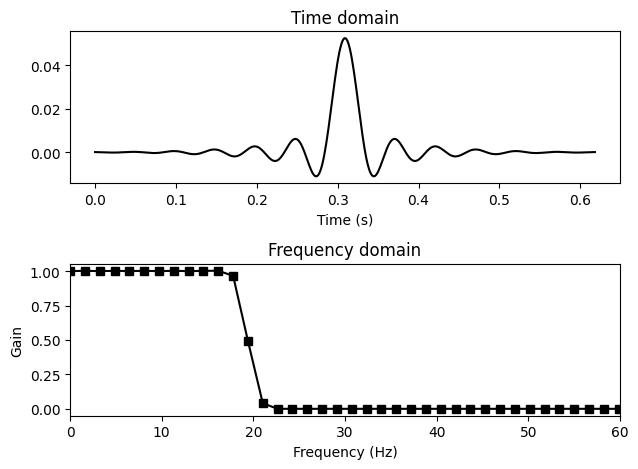

In [3]:
plt.subplot(211)
plt.plot(np.arange(0,len(filtkern))/srate, filtkern, "k")
plt.xlabel("Time (s)")
plt.title("Time domain")

plt.subplot(212)
hz = np.linspace(0, srate, len(filtkern))
plt.plot(hz, abs(scipy.fft.fft(filtkern))**2, "ks-")
plt.xlim([0, lowcut*3])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.title("Frequency domain")

plt.tight_layout()

In [4]:
erp1 = np.mean(dataC, axis=1)

erp1 = scipy.signal.filtfilt(filtkern, 1, erp1)

In [5]:
erp2 = np.zeros(data["timevec"].shape)

for triali in range(data["csd"].shape[2]):
    filterX = scipy.signal.filtfilt(filtkern, 1, dataC[:,triali])
    erp2 = erp2 + filterX
erp2 = erp2 / triali

In [6]:
supertrial = np.reshape(dataC, (1,-1), order="F")
supertrial = scipy.signal.filtfilt(filtkern, 1, supertrial)

erp3 = np.reshape(supertrial, (dataC.shape), order="F")
erp3 = np.mean(erp3, axis=1)

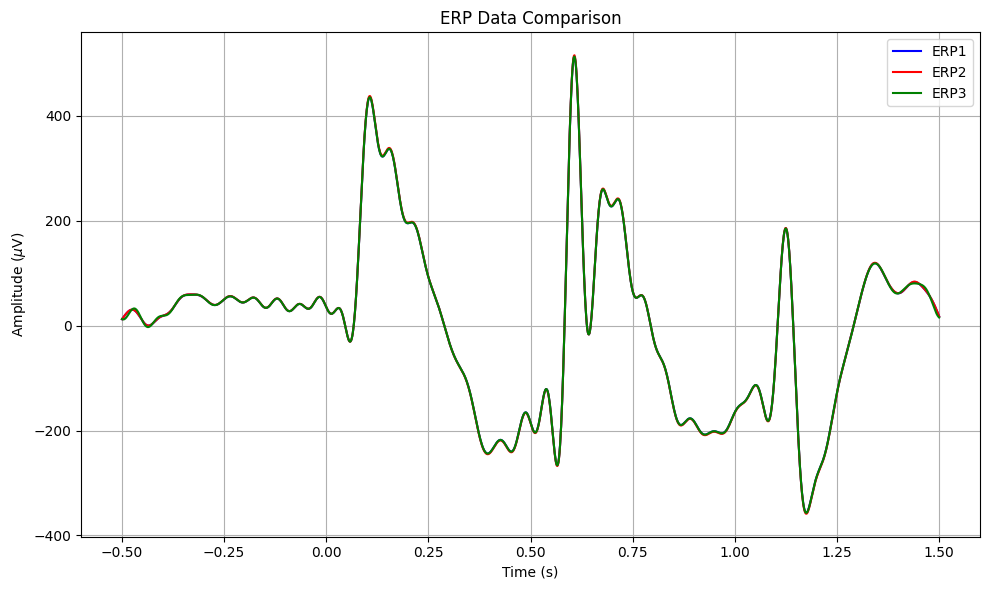

In [7]:
plt.figure(figsize=(10, 6))  
plt.plot(data["timevec"].T, erp1, label='ERP1', color='blue') 
plt.plot(data["timevec"].T, np.squeeze(erp2), label='ERP2', color='red')   
plt.plot(data["timevec"].T, erp3, label='ERP3', color='green') 

plt.title("ERP Data Comparison")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude ($\mu$V)")  
plt.legend()  

plt.grid(True)
plt.tight_layout()  
plt.show()
